### Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

## **0. *Preparation***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/content/student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Loading the data into the data frame

In [ ]:
dataset.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
dataset.dtypes

,0
Hours,float64
Scores,int64


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
dataset.value_counts()

,,count
Hours,Scores,
1.1,17,1
5.1,47,1
8.9,95,1
8.5,75,1
8.3,81,1
7.8,86,1
7.7,85,1
7.4,69,1
6.9,76,1


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## **1. *Exploratory data analysis***


## **2. *Feature Engineering***



*   *Check Missing Value Handling*


In [ ]:
# check missing  values
dataset.isna().sum()

,0
Hours,0
Scores,0


In [ ]:
dataset.value_counts()

,,count
Hours,Scores,
1.1,17,1
5.1,47,1
8.9,95,1
8.5,75,1
8.3,81,1
7.8,86,1
7.7,85,1
7.4,69,1
6.9,76,1


*   *Check Duplicated Data*

In [ ]:
df = dataset.copy()

In [ ]:
# Check Any Duplicates
print("Before duplicates checking : ")
print(df.shape)

Before duplicates checking : 
(25, 2)


In [ ]:
duplicate_rows_before = df[df.duplicated()]
print("Number of duplicate rows : ", duplicate_rows_before.shape)

Number of duplicate rows :  (0, 2)


In [ ]:
print("After duplicates checking : ")
print(df.shape)

After duplicates checking : 
(25, 2)


* *Outlier Analysis*

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

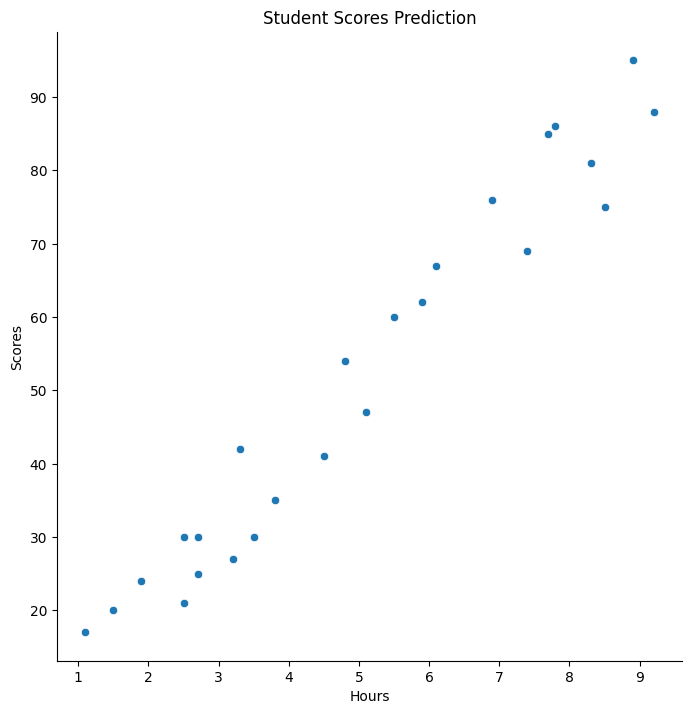

In [ ]:
plt.figure(figsize=(12,6))
sns.pairplot(dataset,x_vars=['Hours'],y_vars=['Scores'], size=7, kind="scatter")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Student Scores Prediction')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


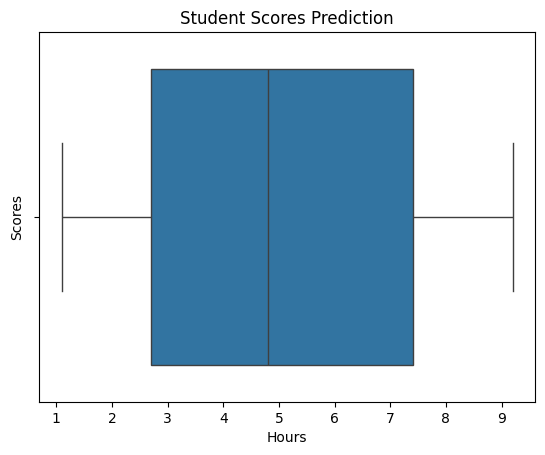

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours")
plt.ylabel("Scores")  # Anda bisa menggunakan "Years of Experience" atau "Tahun Pengalaman"
plt.title("Student Scores Prediction")

# Menampilkan plot
plt.show()


# **Splitting Data**

In [ ]:
# Hours data
X = dataset['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
# Scores data
y = dataset['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [ ]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data for train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

In [ ]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create new axis for x column in array
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [ ]:
#array
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [ ]:
#array
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
#array
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [ ]:
#array
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predicting the Scores for the Test values
y_pred = lr_model.predict(X_test)

In [ ]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

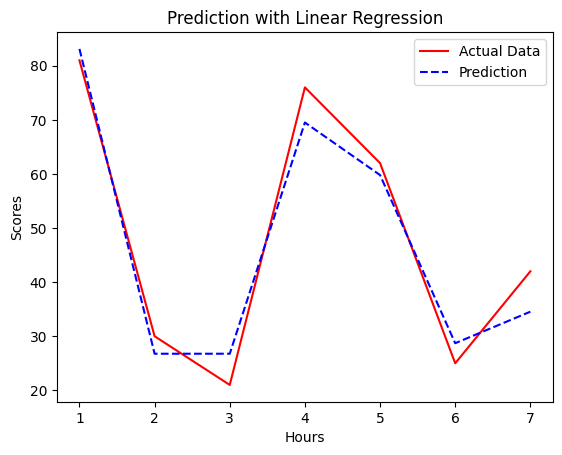

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [ ]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


In [ ]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.4803670915057623
Coefficient of the line Linear Regression: [9.71409219]




Decision Tree Regressor Using another Machine Learning Model :

    Decision Tree
    Random Forest

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predicting the Scores for the Test values
y_pred_dt = dt_model.predict(X_test)

In [ ]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [ ]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

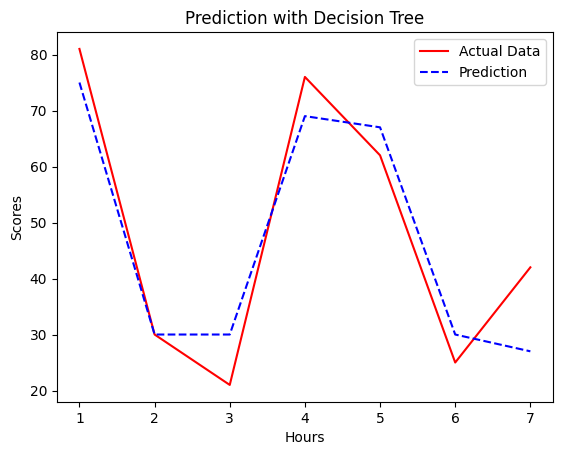

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [ ]:
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8803859268443893


Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predicting the Scores for the Test values
y_pred_rf = rf_model.predict(X_test)

In [ ]:
y_pred_rf

array([79.41, 28.24, 28.24, 71.87, 63.14, 29.21, 28.19])

In [ ]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

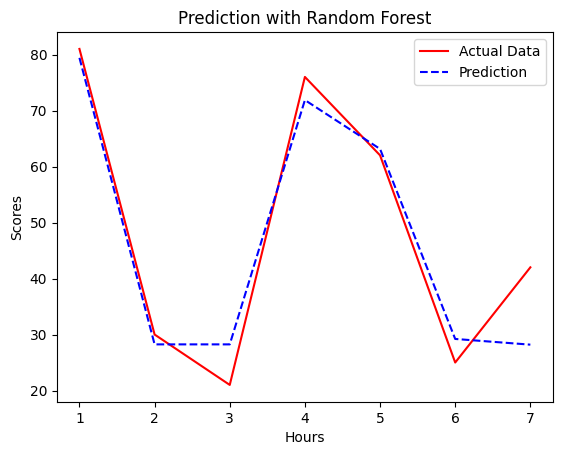

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_rf,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

In [ ]:
# Calculate R square vale
rsq_rf = r2_score(y_test,y_pred_rf)

In [ ]:
print('r square Random Forrest Results:',rsq_rf)

r square Random Forrest Results: 0.9227417854928704


conclussion of all

In [ ]:
print('r square Linear Regression:',rsq)
print('r square Decision Tree Results:',rsq_dt)
print('r square Random Forrest Results:',rsq_rf)


r square Linear Regression: 0.9553509219739938
r square Decision Tree Results: 0.8803859268443893
r square Random Forrest Results: 0.9227417854928704
